In [1]:
import os
import h5py
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from IPython.display import HTML

from astropy import units as u

from visualize_foreground import *

R_sun = 6.957e10
%matplotlib inline

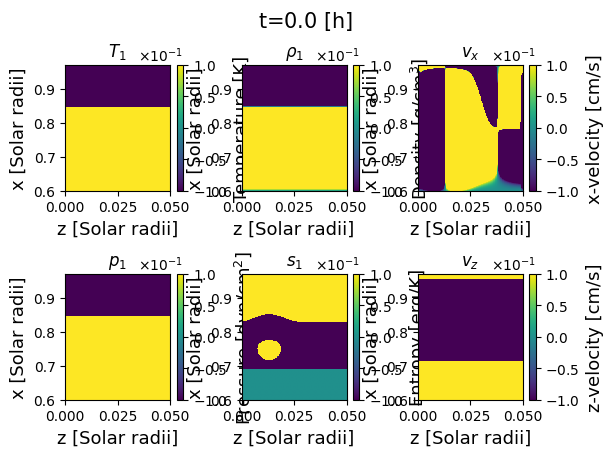

In [106]:
vf_rk2_upw1 = Visualize_Foreground("../data/test_pert_rk2_upw1/")
vf_rk2_upw1.plot_all(plt.figure(), 6)

In [214]:
variables, info = read_fg("../data/rk2_upw2_pertubation/snap100.h5")
print((1/(np.max(np.abs(variables['vx']))/info['dx'])*u.s).to('h'))

#plt.imshow(variables['vz'], aspect=1/5, origin='lower')
#plt.colorbar()

493.8602276598029 h


In [68]:
t = []
vx_max = []

for i in range(600):
    variables, info = read_fg("../data/vz_ten_copy/snap{}.h5".format(i))
    vx_max.append(np.max(np.abs(variables['vz'])))
    t.append(info['t'])


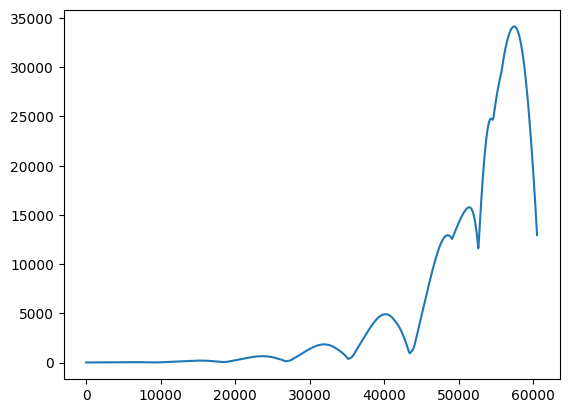

In [69]:
plt.plot(t, vx_max)
plt.show()

/opt/homebrew/lib/python3.11/site-packages/matplotlib/image.py:492: RuntimeWarning: overflow encountered in divide
  vrange /= ((a_max - a_min) / frac)
/opt/homebrew/lib/python3.11/site-packages/matplotlib/colors.py:1355: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)


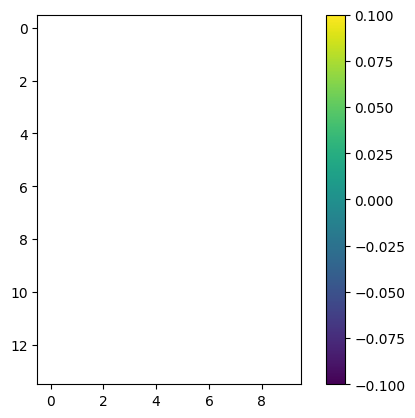

In [10]:
plt.imshow(variables['T1'])
plt.colorbar()
plt.show()

In [31]:
r/R_sun

array([5.17777778e-01, 5.58888889e-01, 6.00000000e-01, 6.41111111e-01,
       6.82222222e-01, 7.23333333e-01, 7.64444444e-01, 8.05555556e-01,
       8.46666667e-01, 8.87777778e-01, 5.13367571e-05, 1.01111111e+00,
       1.01111111e+00, 1.09333333e+00])

In [36]:
r/R_sun

array([5.17777778e-01, 5.58888889e-01, 6.00000000e-01, 6.41111111e-01,
       6.82222222e-01, 7.23333333e-01, 7.64444444e-01, 8.05555556e-01,
       8.46666667e-01, 8.87777778e-01, 5.13367571e-05, 1.01111111e+00,
       1.01111111e+00, 1.09333333e+00])

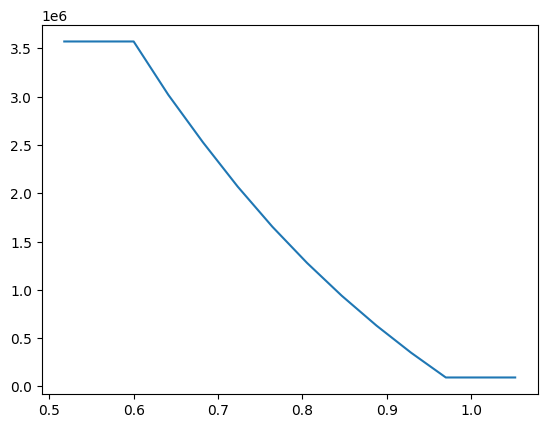

In [37]:

with h5py.File('../data/save_test/background.h5', 'r') as f:
    r = f['/variables/r'][:]
    T0 = f['/variables/T0'][:]
plt.plot(r/R_sun, T0)
plt.show()

In [15]:
!ls -l ../data/save_test/snap0.h5

In [58]:
variables, info = read_fg("../data/save_test/snap12.h5")

variables['vz']

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

/var/folders/k6/k6jkpmqs13l4qhz_xy4wzlmw0000gn/T/ipykernel_2286/967915779.py:7: RuntimeWarning: divide by zero encountered in divide
  H = - dz / dp * bg_variables['p0'][:-1]


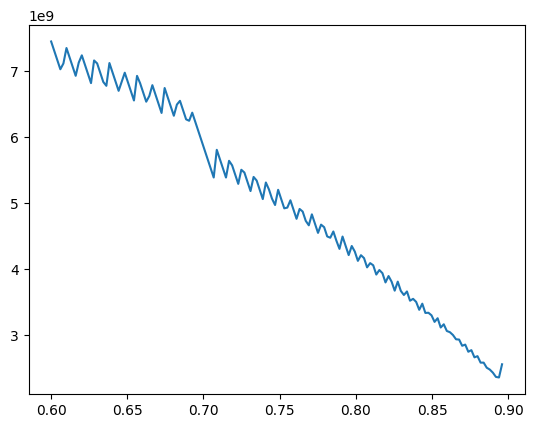

In [267]:
#H = - dz / dlnp = - dz p /dp

bg_variables, info_bg = read_bg("../data/rk2_upw2_pertubation_no_max//background.h5")

dz = (bg_variables['r'] - np.roll(bg_variables['r'], -1))[:-1]
dp = (bg_variables['p0'] - np.roll(bg_variables['p0'], -1))[:-1]
H = - dz / dp * bg_variables['p0'][:-1]

plt.plot(bg_variables['r'][:-1]/R_sun, H)

In [271]:
info['dx']/1e9

0.0891923076923077

In [280]:
info['dz']/1e9 / 2

0.07003691275167787

In [257]:
info['dx'], info['dz'], info['nx'], info['nz']

(array(89192307.6923077),
 array(1.40073826e+08),
 array(40, dtype=int32),
 array(150, dtype=int32))

In [55]:
variables['vz'][:10,0]

array([    0.        ,     0.        ,     0.        ,  2037.82934077,
        6576.21818181,  9745.4095432 , 10274.52843705,  8341.86748274,
        3835.8802293 , -2569.13240714])

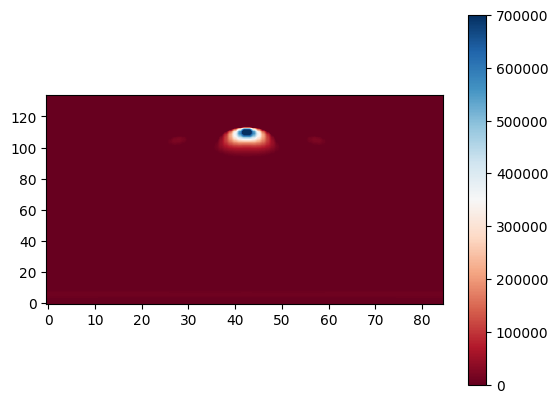

In [62]:
variables, info = read_fg('../data/full_run_test_no_load/snap53.h5')
plt.imshow(variables['vz'], origin='lower', aspect=1/3, cmap='RdBu', vmin=0, vmax=0.7e6)
plt.colorbar()

In [48]:
variables['p1']

array([[1.00959053e+08, 1.00959100e+08, 1.00959143e+08, 1.00959180e+08,
        1.00959212e+08, 1.00959238e+08, 1.00959259e+08, 1.00959276e+08,
        1.00959287e+08, 1.00959293e+08, 1.00959295e+08, 1.00959291e+08,
        1.00959283e+08, 1.00959270e+08, 1.00959253e+08, 1.00959231e+08,
        1.00959204e+08, 1.00959173e+08, 1.00959137e+08, 1.00959097e+08],
       [1.00959276e+08, 1.00959323e+08, 1.00959365e+08, 1.00959401e+08,
        1.00959432e+08, 1.00959458e+08, 1.00959479e+08, 1.00959495e+08,
        1.00959506e+08, 1.00959512e+08, 1.00959514e+08, 1.00959511e+08,
        1.00959503e+08, 1.00959490e+08, 1.00959473e+08, 1.00959451e+08,
        1.00959425e+08, 1.00959394e+08, 1.00959359e+08, 1.00959320e+08],
       [1.00959689e+08, 1.00959734e+08, 1.00959774e+08, 1.00959809e+08,
        1.00959839e+08, 1.00959864e+08, 1.00959884e+08, 1.00959899e+08,
        1.00959910e+08, 1.00959916e+08, 1.00959917e+08, 1.00959914e+08,
        1.00959906e+08, 1.00959894e+08, 1.00959878e+08, 1.0095

In [19]:
variables, info = read_fg('../data/rk1_test_test/snap0.h5')
plt.imshow(variables['rho1'], origin='lower', aspect=1/5)

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '../data/rk1_test_test/snap0.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [15]:
variables_bg['p0'][:,np.newaxis]

array([[5.14273966e+13],
       [5.14273966e+13],
       [5.14273966e+13],
       [5.07685954e+13],
       [5.01097942e+13],
       [4.94509930e+13],
       [4.87921918e+13],
       [4.81333906e+13],
       [4.75174015e+13],
       [4.69119966e+13],
       [4.63065918e+13],
       [4.57011869e+13],
       [4.50957821e+13],
       [4.44903772e+13],
       [4.38849724e+13],
       [4.32795676e+13],
       [4.27166890e+13],
       [4.21600116e+13],
       [4.16033342e+13],
       [4.10466568e+13],
       [4.04899793e+13],
       [3.99333019e+13],
       [3.93766245e+13],
       [3.88249289e+13],
       [3.83127495e+13],
       [3.78005702e+13],
       [3.72883908e+13],
       [3.67762115e+13],
       [3.62640321e+13],
       [3.57518527e+13],
       [3.52396734e+13],
       [3.47486564e+13],
       [3.42771410e+13],
       [3.38056256e+13],
       [3.33341102e+13],
       [3.28625947e+13],
       [3.23910793e+13],
       [3.19195639e+13],
       [3.14517228e+13],
       [3.10173929e+13],


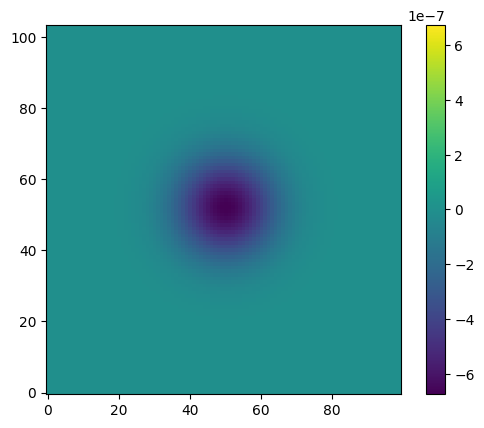

In [18]:
variables, info = read_fg('../data/rk1_upw1_new_soft_wall/snap0.h5')
variables_bg, _ = read_bg('../data/rk1_upw1_new_soft_wall/background.h5')

p1_over_p0 = variables['p1'] / variables_bg['p0'][:, np.newaxis]

vmax = np.max(np.abs(p1_over_p0))
vmin = -vmax

plt.imshow(p1_over_p0, origin='lower', vmin = vmin, vmax=vmax)
plt.colorbar()

In [9]:
1.3807e-16/(0.61*1.66053907e-24)

136307700.54394564

In [216]:
def print_attrs(name, obj):
    """Print attributes of the HDF5 object."""
    print(name)
    for key, val in obj.attrs.items():
        print(f"  ATTRIBUTE {key}: {val}")

def explore_hdf5(file_path):
    with h5py.File(file_path, 'r') as f:
        # Print the attributes of the root group
        print_attrs('/', f)

        # Using the visititems method to traverse the file's structure
        f.visititems(print_attrs)

file_path = '../data/rk2_upw2_pertubation_no_max/snap132.h5'
explore_hdf5(file_path)

/
  ATTRIBUTE header: [b'This is the root header']
grid_info
  ATTRIBUTE header: [b'This is the grid data header']
grid_info/dx
  ATTRIBUTE unit: [b'cm']
grid_info/dz
  ATTRIBUTE unit: [b'cm']
grid_info/nx
  ATTRIBUTE unit: [b'Grid points in x']
grid_info/nz
  ATTRIBUTE unit: [b'Grid points in z']
grid_info/nz_full
  ATTRIBUTE unit: [b'Full grid points in z']
grid_info/nz_ghost
  ATTRIBUTE unit: [b'Ghost points in z']
grid_info/t
  ATTRIBUTE unit: [b's']
grid_info/x0
  ATTRIBUTE unit: [b'cm']
grid_info/x1
  ATTRIBUTE unit: [b'cm']
grid_info/z0
  ATTRIBUTE unit: [b'cm']
grid_info/z1
  ATTRIBUTE unit: [b'cm']
variables
  ATTRIBUTE header: [b'This is the variables header']
variables/T1
  ATTRIBUTE unit: [b'K']
variables/p1
  ATTRIBUTE unit: [b'dyn/cm^2']
variables/rho1
  ATTRIBUTE unit: [b'g/cm^3']
variables/s1
  ATTRIBUTE unit: [b'erg/K']
variables/vx
  ATTRIBUTE unit: [b'cm/s']
variables/vz
  ATTRIBUTE unit: [b'cm/s']


In [78]:
def check_dataset(file_path):
    with h5py.File(file_path, 'r') as f:
        print("T1" in f['variables'])

file_path = '../data/save_test/snap0.h5'
check_dataset(file_path)

True


In [67]:
print(info)

t: 1.00
nx: 50
nz: 50
nz_ghost: 2
dx: 70989795.92
dz: 525324489.80


In [41]:
r, T0, rho0, p0, g, grad_s0 = read_bg('../data/test_fix_rk1_upw1_boundary0/background.h5')

In [47]:
np.max(vx[:,0])

-4.933272313174131e-16

Okay nnow we try to plot vx in the first step with vx(t=0)=0 and every variable it uses in the derivative

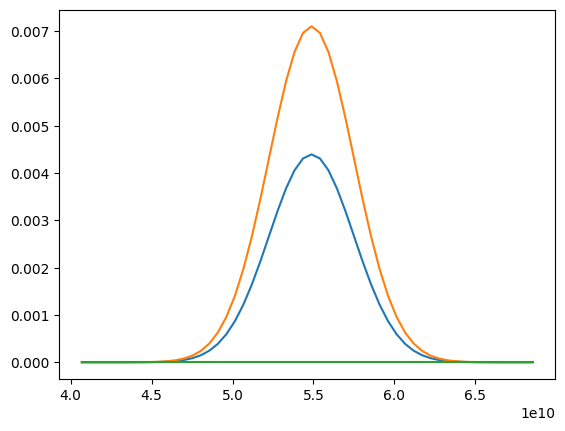

In [59]:
plt.plot(r, p1[:,0])
plt.plot(r, p1[:,1])
plt.plot(r, p1[:,-1])

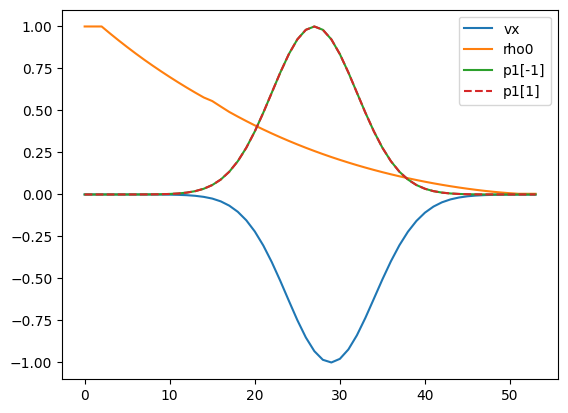

In [56]:
T1, rho1, p1, s1, vx, vz, info = read_fg("../data/test_fix_rk1_upw1_boundary0/snap1.h5")
plt.plot(r, vx[:,0]/(np.abs(vx[:,0]).max()), label='rvx(t$_{n+1}$)')
plt.plot(r, rho0/rho0.max(), label='rho0')
T1, rho1, p1, s1, vx, vz, info = read_fg("../data/test_fix_rk1_upw1_boundary0/snap0.h5")
plt.plot(r, p1[:,-1]/np.abs(p1[:,-1]).max(), label='p1[-1]')
plt.plot(r, p1[:,1]/np.abs(p1[:,1]).max(), label='p1[1]', linestyle="--")
plt.legend()

So we know it's definitely because of p1 but p1 looks to be correct.

In [65]:
info

't: 1.00\nnx: 50\nnz: 50\nnz_ghost: 2\ndx: 70989795.92\ndz: 525324489.80'

In [64]:
#define R_START 0.6 // In units of solar radii
#define R_END 0.97 // In units of solar radii
#define X_SIZE 0.05

((0.97-0.6)/0.05) * 100

740.0

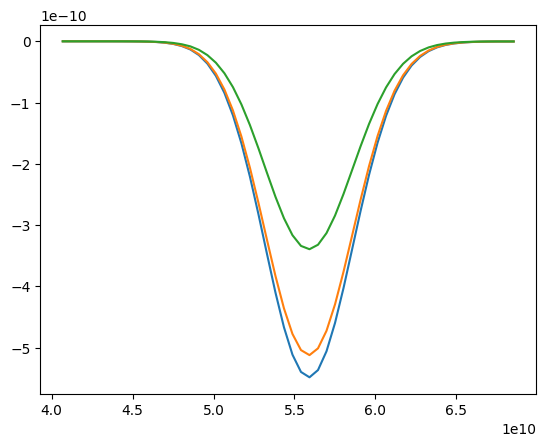

In [60]:
T1, rho1, p1, s1, vx, vz, info = read_fg("../data/test_fix_rk1_upw1_boundary0/snap1.h5")
plt.plot(r, vx[:,0])
plt.plot(r, vx[:,1])
plt.plot(r, vx[:,-1])

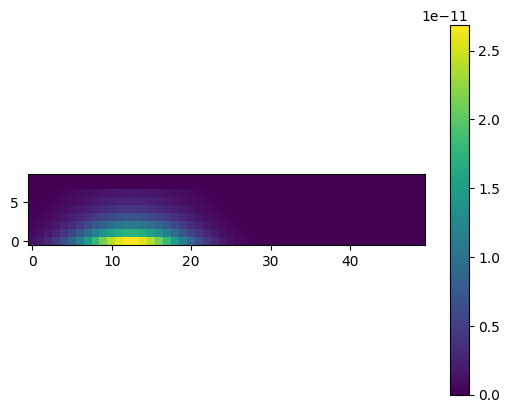

In [36]:
plt.figure()
plt.imshow(vz[-10:-1,:], aspect=1, origin='lower')
plt.colorbar()
plt.show()

In [ ]:
vx[:,2]
plt.figure()
plt.plot(vx[:,0])
plt.plot(vx[:,1])
plt.plot(vx[:,2])


In [75]:
x1

array(1.3914e+10)

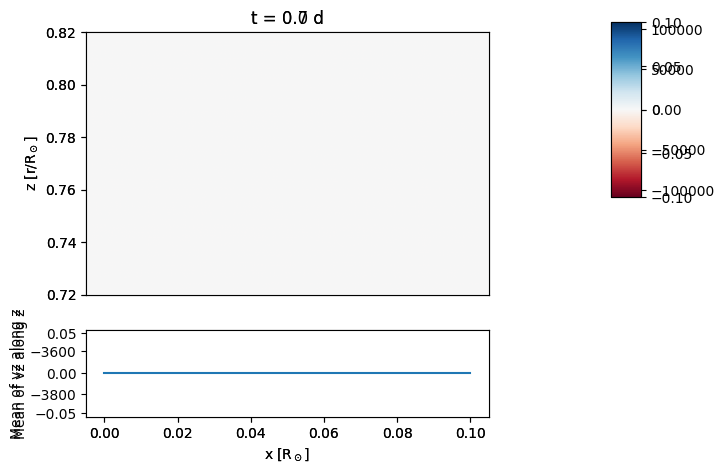

In [3]:
""" ALONG Z-DIRECTION"""

def plot_sod(fig, snap_nr, key):
    variables, info = read_fg("../data/sod_shock_vertical_periodic/snap{}.h5".format(snap_nr))
    t, nx, nz, nz_full, nz_ghost, dx, dz, z0, z1, x0, x1 = info['t'], info['nx'], info['nz'], info['nz_full'], info['nz_ghost'], info['dx'], info['dz'], info['z0'], info['z1'], info['x0'], info['x1']
    
    t = (t*u.s).to('day')

    x = np.linspace(x0, x1, nx)
    extent=np.array([x0,x1,z0,z1])/R_sun

    var = variables[key]
    var_mean = np.mean(var, axis=0)

    gs = gridspec.GridSpec(2, 2, height_ratios=[3, 1], width_ratios=[20, 1])

    ax1 = fig.add_subplot(gs[0, 0])
    ax1.set_ylabel('z [r/R$_\odot$]')
    ax1.set_xticks([])
    ax1.set_title("t = {:.1f}".format(t))  # Format time to one decimal places
    cax = ax1.imshow(var, aspect='auto', origin='lower', cmap='RdBu', extent=extent)

    cbar_ax = fig.add_subplot(gs[0, 1])
    # Adjust the position of the colorbar axes to move it closer to the main plot
    cbar_ax.set_position([1, 0.55, 0.05, 0.35])  # you might need to adjust these numbers
    fig.colorbar(cax, cax=cbar_ax)

    ax2 = fig.add_subplot(gs[1, 0])
    ax2.plot(x/R_sun,var_mean)
    ax2.set_xlabel('x [R$_\odot$]')
    ax2.set_ylabel('Mean of {} along z'.format(key))

    #variables, info = read_fg("../data/periodic_rk2_upw1_sod_horizontal/snap20.h5")
    #var_mean = np.mean(variables[key], axis=0)
    #ax2.plot(x/R_sun,var_mean, color="black", linestyle="--")

fig = plt.figure(figsize=(6, 5))
key = 'vz'

def init_animation():
    plot_sod(fig, 0, key)

def update_animation(snap_nr):
        """Update the plots for each frame."""
        for ax in fig.get_axes():
            ax.clear()  # Clear previous data
        fig.clear()
        plot_sod(fig, snap_nr, key)  # Plot the new snapshot

save_name = "sod_vertical_vz.mp4"

anim = FuncAnimation(fig, update_animation, interval=250, frames=range(0,57), init_func=init_animation)
anim.save(save_name, writer='ffmpeg', fps=20, extra_args=['-vcodec', 'libx264'])
#HTML(anim.to_html5_video())



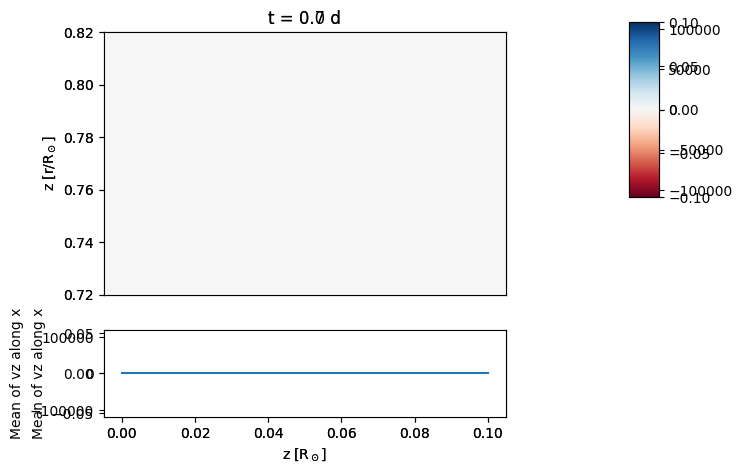

In [8]:
""" ALONG X-DIRECTION """

def plot_sod(fig, snap_nr, key):
    variables, info = read_fg("../data/sod_shock_vertical_periodic/snap{}.h5".format(snap_nr))
    t, nx, nz, nz_full, nz_ghost, dx, dz, z0, z1, x0, x1 = info['t'], info['nx'], info['nz'], info['nz_full'], info['nz_ghost'], info['dx'], info['dz'], info['z0'], info['z1'], info['x0'], info['x1']
    
    t = (t*u.s).to('day')

    x = np.linspace(x0, x1, nx)
    extent=np.array([x0,x1,z0,z1])/R_sun

    var = variables[key]
    var_mean = np.mean(var[2:-2], axis=1)

    gs = gridspec.GridSpec(2, 2, height_ratios=[3, 1], width_ratios=[20, 1])

    ax1 = fig.add_subplot(gs[0, 0])
    ax1.set_ylabel('z [r/R$_\odot$]')
    ax1.set_xticks([])
    ax1.set_title("t = {:.1f}".format(t))  # Format time to one decimal places
    cax = ax1.imshow(var, aspect='auto', origin='lower', cmap='RdBu', extent=extent)

    cbar_ax = fig.add_subplot(gs[0, 1])
    # Adjust the position of the colorbar axes to move it closer to the main plot
    cbar_ax.set_position([1, 0.55, 0.05, 0.35])  # you might need to adjust these numbers
    fig.colorbar(cax, cax=cbar_ax)

    ax2 = fig.add_subplot(gs[1, 0])
    ax2.plot(x/R_sun,var_mean)
    ax2.set_xlabel('z [R$_\odot$]')
    ax2.set_ylabel('Mean of {} along x'.format(key))

    #variables, info = read_fg("../data/periodic_rk2_upw1_sod_horizontal/snap20.h5")
    #var_mean = np.mean(variables[key], axis=0)
    #ax2.plot(x/R_sun,var_mean, color="black", linestyle="--")

fig = plt.figure(figsize=(6, 5))
key = 'vz'

def init_animation():
    plot_sod(fig, 0, key)

def update_animation(snap_nr):
        """Update the plots for each frame."""
        for ax in fig.get_axes():
            ax.clear()  # Clear previous data
        fig.clear()
        plot_sod(fig, snap_nr, key)  # Plot the new snapshot

save_name = "sod_vertical_vz.mp4"

anim = FuncAnimation(fig, update_animation, interval=250, frames=range(0,57), init_func=init_animation)
anim.save(save_name, writer='ffmpeg', fps=20, extra_args=['-vcodec', 'libx264'])
#HTML(anim.to_html5_video())


In [149]:
def read_mpi_info(file_path):
    with h5py.File(file_path, 'r') as f:
        n_procs = f['/total_processes'][()]
    return n_procs

In [187]:
def get_total_var(snap, var_name, n_procs, folder):
    variables = []

    for i in range(n_procs):
        variable, info = read_fg("{}snap{}_{}.h5".format(folder,snap, i))
        variables.append(variable)

    t = info['t']


    total_var_list = []
    for i in range(n_procs):
        if i == 0:
            total_var_list.append(variables[i][var_name][:-2])
        elif i == n_procs - 1:
            total_var_list.append(variables[i][var_name][2:])
        else:
            total_var_list.append(variables[i][var_name][2:-2])
    total_var = np.concatenate(total_var_list, axis=0)
    
    return total_var, t

In [164]:
total_var, t = get_total_var(0, "p1", n_procs, folder_mpi)

variables, info = read_fg("{}snap{}.h5".format(folder_no_mpi,0))

single_var = variables['p1']

total_var.shape, single_var.shape

((100, 100), (104, 100))

(104, 100)


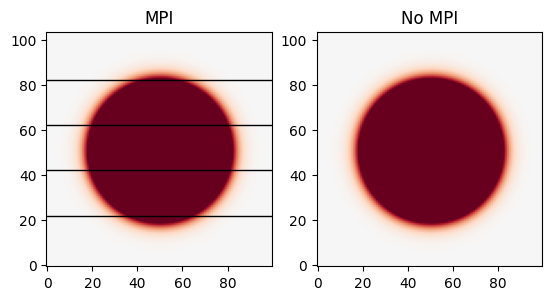

In [201]:
var_name = "p1"

folder_mpi = "../data/mpi_on/"
folder_no_mpi = "../data/mpi_off/"

vmax = 1e5

num_files = 40
interval = 1

n_procs = read_mpi_info("{}mpi_info.h5".format(folder_mpi))

# Initialize the plot
fig, ax = plt.subplots(1, 2)
variable, t = get_total_var(0, var_name, n_procs, folder_mpi)
print(variable.shape)
cax0 = ax[0].imshow(variable, origin='lower', cmap="RdBu", vmin=-vmax, vmax=vmax)
#cbar = plt.colorbar(cax)

variables, info = read_fg("{}snap{}.h5".format(folder_no_mpi, 0))


cax1 = ax[1].imshow(variables[var_name], origin='lower', cmap="RdBu", vmin=-vmax, vmax=vmax)

#cbar1 = fig.colorbar(cax0, ax=ax[0], shrink=0.6)
#cbar2 = fig.colorbar(cax1, ax=ax[1], shrink=0.6)

# The update function for animation
def update(frame):
    ax[0].clear()
    ax[1].clear()
    variable, t = get_total_var(frame, var_name, n_procs, folder_mpi)
    cax0 = ax[0].imshow(variable, origin='lower', cmap="RdBu", vmin=-vmax, vmax=vmax)
    ax[0].set_title('MPI')
    ax[0].axhline(y=22, color='black', linewidth=1)
    ax[0].axhline(y=42, color='black', linewidth=1)
    ax[0].axhline(y=62, color='black', linewidth=1)
    ax[0].axhline(y=82, color='black', linewidth=1)

    variables, info = read_fg("{}snap{}.h5".format(folder_no_mpi, frame))
    cax1 = ax[1].imshow(variables[var_name], origin='lower', cmap="RdBu", vmin=-vmax, vmax=vmax)
    ax[1].set_title('No MPI')
    

# Animate
ani = animation.FuncAnimation(fig, update, frames=range(0,num_files, interval), repeat=False)
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save('animation.mp4', writer=writer)

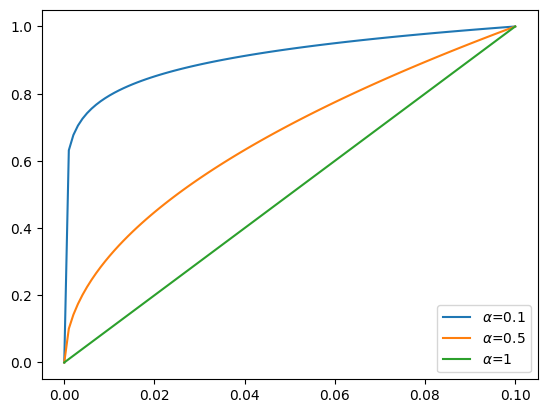

In [22]:
zb = 0.0
z0 = 0.1

def w(z, alpha):
    return ((z-zb)/(z0-zb))**alpha

z = np.linspace(0, z0, 100)

plt.plot(z, w(z, 0.1), label=r"$\alpha$=0.1")
plt.plot(z, w(z, 0.5), label=r"$\alpha$=0.5")
plt.plot(z, w(z, 1), label=r"$\alpha$=1")

plt.legend()
plt.show()